In [96]:
#importações necessárias 
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [97]:
altura=38970   
massa=84 # QUilogramas
K = 100 # Produto entre Cd e a área do félix com a roupa
Cd=0.82

Area_trans_F=1.7*0.425 #área de um retângulo, em metros quadrados, consideradno altura e distÂncia entre ombros
area_trans_P= 48 # Metros Quadrados
G = 6.67 * 1e3 # Constante gravitacional Universal
R = 6371 * 1e3 # Raio da Terra em metros
M = 59742 * 1e24 # Em Kg




#Dados Iniciais

x0=0
y0=altura
vx_0=0.5
vy_0=0

CI=[x0, y0, vx_0, vy_0]

dt=1
tf=260
tempo=np.arange(0,tf,dt)




In [98]:
#implementando a função densidade em relação a altura
def densidade(h):
    a=-(h/8882)
    densidade_ar=1.225*(e**a)
    if densidade_ar<0:
        densidade_ar=0
    return densidade_ar    




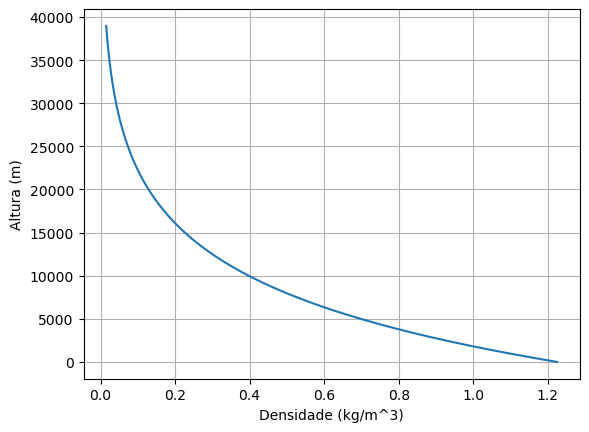

In [99]:
#plotando o gráfico
lista_densidade=[]
lista_altura=np.arange(0, altura, 1)
for i in lista_altura:
    lista_densidade.append(densidade(i))



plt.plot(lista_densidade, lista_altura)
plt.grid()
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Altura (m)')
plt.show()





In [100]:
def modelo(k, t_queda,): 
    y = k[0]
    v = k[1]

    densi = densidade(y)
    
    F_arrasto = (1/2)*densi*K*(v**2)

    Peso = (G*M*massa)*(1/(R+y)**2)

    dydt = -v
    
    dvydt = ((F_arrasto)-Peso)/(massa)

    dkdt=[dydt, dvydt]
    return dkdt    

In [101]:
reso_numerica = odeint(modelo, CI, tempo)

lista_y =reso_numerica[:,0]
lista_v =reso_numerica[:,1]



plt.plot(tempo, lista_v)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

RuntimeError: The size of the array returned by func (2) does not match the size of y0 (4).